## In this script I am looking at the watermass transformation in the FMsk experiments (global SST and SSS with ORCA2 resolution in the FDS region only)

In [1]:

import glob
import itertools
import math
import numpy as np
import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset # module to open netcdf
import os
import pylab
import sys  #module to get external varaibles
import scipy.signal
import time


from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

Gilles_Grid = np.array([[-35. ,  -5. , -20. ,  -5. , -20. , -10. , -35. , -10. ],
       [-35. ,   4. , -20. ,   4. , -20. ,  -5. , -35. ,  -5. ],
       [-20. ,   0. ,  -0.1,   0. ,  -0.1, -10. , -20. , -10. ],
       [-50. ,  15. , -25. ,  15. , -25. ,   5. , -50. ,   5. ],
       [-75. ,  20. , -55. ,  20. , -55. ,  15. , -75. ,  15. ],
       [-55. ,  20. , -30. ,  20. , -30. ,  15. , -55. ,  15. ],
       [-30. ,  25. , -20. ,  25. , -20. ,  15. , -30. ,  15. ],
       [-20. ,  30. , -12. ,  30. , -17. ,  15. , -20. ,  15. ],
       [-47. ,  30. , -30. ,  30. , -30. ,  20. , -47. ,  20. ],
       [-55. ,  30. , -47. ,  30. , -47. ,  20. , -55. ,  20. ],
       [-75. ,  27. , -55. ,  27. , -55. ,  20. , -75. ,  20. ],
       [-75. ,  34. , -55. ,  34. , -55. ,  27. , -75. ,  27. ],
       [-73. ,  36. , -55. ,  36. , -55. ,  34. , -73. ,  34. ],
       [-55. ,  38. , -35. ,  38. , -35. ,  30. , -55. ,  30. ],
       [-35. ,  35. , -20. ,  35. , -20. ,  25. , -35. ,  25. ],
       [-20. ,  40. , -10. ,  40. , -10. ,  30. , -20. ,  30. ],
       [-40. ,  40. , -20. ,  40. , -20. ,  35. , -40. ,  35. ],
       [-40. ,  45. , -20. ,  45. , -20. ,  40. , -40. ,  40. ],
       [-20. ,  45. ,  -8. ,  45. ,  -8. ,  40. , -20. ,  40. ],
       [-40. ,  50. , -20. ,  50. , -20. ,  45. , -40. ,  45. ],
       [-20. ,  49. ,  -8. ,  49. ,  -8. ,  45. , -20. ,  45. ],
       [-70. ,  40. , -55. ,  40. , -55. ,  36. , -70. ,  36. ],
       [-55. ,  42. , -40. ,  42. , -40. ,  38. , -55. ,  38. ],
       [-45. ,   5. , -34. ,   5. , -34. ,  -3. , -45. ,  -3. ],
       [-36. , -10. , -25. , -10. , -25. , -20. , -36. , -20. ],
       [-10. , -10. ,  10. , -10. ,  10. , -20. , -10. , -20. ],
       [-45. ,  55. , -30. ,  55. , -30. ,  50. , -45. ,  50. ],
       [-30. ,  55. , -12. ,  55. , -12. ,  50. , -30. ,  50. ],
       [-15. ,  70. ,   5. ,  70. ,   5. ,  62. , -15. ,  62. ],
       [-24. ,  62. ,  -8. ,  62. ,  -8. ,  55. , -24. ,  55. ],
       [-40. ,  62. , -24. ,  62. , -24. ,  55. , -40. ,  55. ],
       [-56. ,  58.7, -45. ,  58.7, -45. ,  50. , -48. ,  50. ]])

loc="/data/igcmg/database/grids"
os.chdir(loc)
os.getcwd()
file2read1 = Dataset('ORCA2.3_grid.nc','r')
area = np.array(file2read1.variables['area'])
Aarea = np.concatenate((area[np.newaxis,:,: ], area[np.newaxis,:,: ]), axis=0)
for i in range(98):
    Aarea = np.concatenate((Aarea, area[np.newaxis,:,: ]), axis=0)
sys.path.insert(0, "/ccc/cont003/home/gen7403/estellav/Python/Tools")
import corr_VEP as corr
import Diags_VEP as Diags
import stats_VEP as Stats

In [2]:
Models = []

Models.append({
              'name': 'Control',
              'label':'Control',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'grey',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})
Models.append({
              'name': 'VGSSTSNoI',
              'label':'GlobSSTSC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'red',
              'ls':'-',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGSSTSNoIC1',
              'label':'GlobSSTSC1',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'red',
              'ls':'--',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGSSTSNoIC2',
              'label':'GlobSSTSC2',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'red',
              'ls':'--',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGAtlMSSTSNoI',
              'label':'AtlMskS',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'red',
              'ls':'--',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})
Models.append({
              'name': 'VGGMSSTSNoI',
              'label':'FmskSC0',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'red',
              'ls':':',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGGMSSTSC12',
              'label':'FmskSC1',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'red',
              'ls':':',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

Models.append({
              'name': 'VGGMSSTSC22',
              'label':'FmskSC2',
              'yr0':1,
              'yr1':101,
              'ts0':0,
              'ts1':100*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'red',
              'ls':':',
              'lw':2,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})


Models.append({
              'name': 'CM5A2.1.pi.debug',
              'label':'Target',
              'yr0':1,
              'yr1':101,
              'ts0':1350*12,
              'ts1':1450*12,
              'ts0_flux':0,
              'ts1_flux':100*12,
              'TS':'TS_MO',
              'maxamoc':[[]],
              'volicesum':[[]],
              'volicewint':[[]],
              'exticesum':[[]],
              'exticewint':[[]],
              'sstave':[[]],
              'annees':[[]],
              'color':'k',
              'ls':'-',
              'lw':3,
              'dir':'/ccc/store/cont003/thredds/estellav/IPSLCM5A2/DEVT/piControl/'})

nmodels=9
ntarget=8

In [3]:
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
import matplotlib.gridspec as gridspec

In [4]:
loc="/data/igcmg/database/grids"
os.chdir(loc)
os.getcwd()
file2read1 = Dataset('ORCA2.3_grid.nc','r')
area = np.array(file2read1.variables['area'])
Aarea = np.concatenate((area[np.newaxis,:,: ], area[np.newaxis,:,: ]), axis=0)
for i in range(99):
    Aarea = np.concatenate((Aarea, area[np.newaxis,:,: ]), axis=0)
    
loc="/data/igcmg/database/grids"
os.chdir(loc)
os.getcwd()
file2read1 = Dataset('ORCA2.3_grid.nc','r')
area = np.array(file2read1.variables['area'])

# get access to the model directory
dir1 = '/ccc/store/cont003/thredds/estellav/GillesData'
os.chdir(dir1)
# read the salinity variable
file1 = glob.glob('sosaline_All.nc')

f = Dataset(file1[0],'r')
# read the variables lat and lon
lon = np.array(f.variables['nav_lon'])
lat = np.array(f.variables['nav_lat'])
lon2 = np.array(f.variables['nav_lon'][100:140,110:145])
lat2 = np.array(f.variables['nav_lat'][100:140,110:145])
lats = lat.flatten()
lons = lon.flatten()
areas = area.flatten()

In [5]:

AMOC = np.zeros((nmodels,100))
i=0
for imodel in range(nmodels):

    ## AMOC

    dir1 = Models[imodel]['dir']+Models[imodel]['name']+'/OCE/Analyse/'+Models[imodel]['TS']+'/'
    os.chdir(dir1)
    
    file1 = glob.glob('*_zomsfatl.nc')
    
    f = Dataset(file1[0],'r')
    tab=np.squeeze(f.variables['zomsfatl'][Models[imodel]['ts0']:Models[imodel]['ts1'],:,:])

    depthw = f.variables['depthw'][:]
    lat = f.variables['nav_lat'][:]

    # apply mask
    mask_zomsfatl=np.zeros((tab.shape[0],tab.shape[1],tab.shape[2]))
    mask_zomsfatl[:,:,ma.where(lat<10)]=1.
    mask_zomsfatl[:,:,ma.where(lat>60)]=1.
    mask_zomsfatl[:,ma.where(depthw<500),:]=1.
    mask_zomsfatl[ma.where(tab==0)]=1.
    
    # mask array
    tab_masked=np.ma.array(tab, mask=mask_zomsfatl)
    
    

    # annual mean
    tab_masked_temp=np.reshape(tab_masked,(12,tab_masked.shape[0]/12,tab_masked.shape[1],tab_masked.shape[2]),order='F')
    tab_masked_ann=ma.mean(tab_masked_temp,axis=0)
    AMOC[i,:]=ma.max(tab_masked_ann[:,:,108],axis=1)
    i=i+1

In [6]:
Ensemble= []

Ensemble.append({
              'label': 'GlobST',
              'models': [1,2,3],
              'color':'tab:olive',
              'ls':'-',
              'lw':3,})

Ensemble.append({
              'label': 'FMskSGlobT',
              'models': [5,6,7],
              'color':'red',
              'ls':':',
              'lw':3,})


nmembers=3
nensemble =2

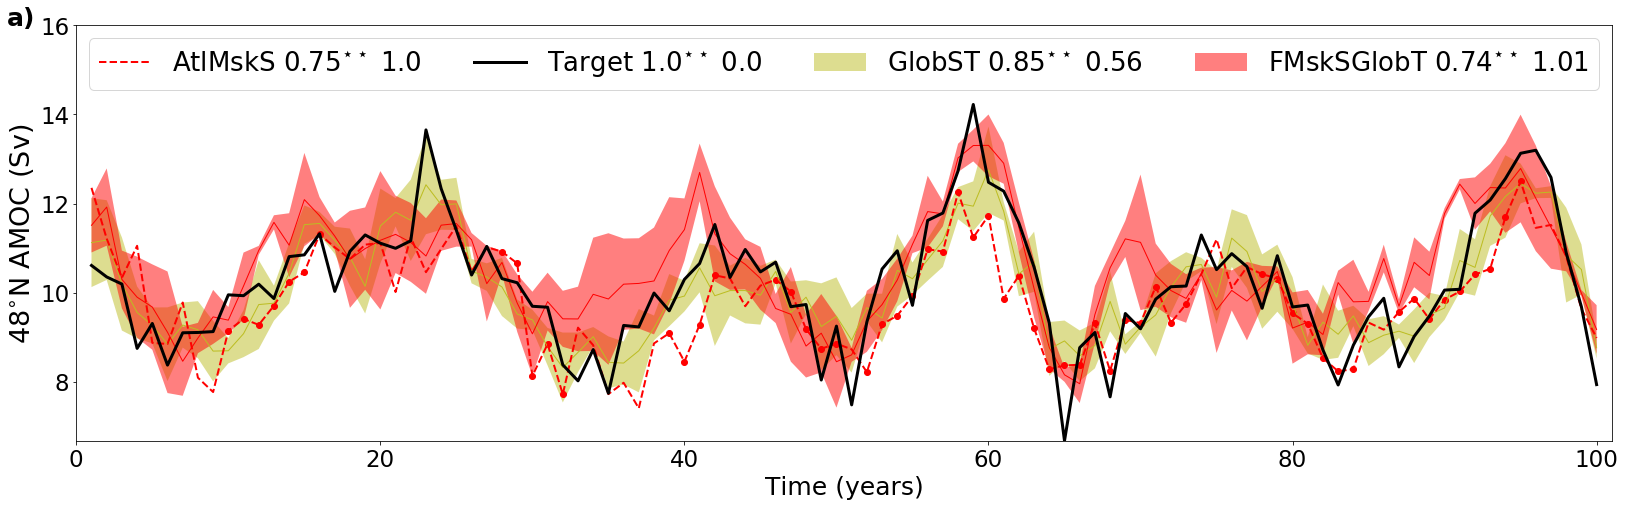

In [9]:
ntime = 100
window =11

max_amoc_48_target=AMOC[ntarget,:]

Max=ma.max( max_amoc_48_target)
Min=ma.min( max_amoc_48_target)



plt.close()
fig = plt.figure(figsize=(4*6,7))

ax2 = plt.subplot2grid((1,3), (0, 0), colspan=3)

mod = [1,4,5]

k=0
j=0


 
    
for iensemble in range(2):
    Ennsemble = np.zeros((nmembers,ntime))
    
    for imember in range(nmembers):
        Ennsemble[imember,:]=ma.copy(AMOC[Ensemble[iensemble]['models'][imember],:])
    
    Std, Average = Stats.ensemble_statistics(Ennsemble, nmembers, ntime)
    
    
    
    sigcorr_AMOC = corr.VE_Window_corr_1D(Average[:Models[imodel]['yr1']-1],AMOC[ntarget,:Models[imodel]['yr1']-1], window) 

    corr_AMOC, sig_95_AMOC, sig_99_AMOC = corr.VE_corr_1D(Average[:Models[imodel]['yr1']-1],AMOC[ntarget,:Models[imodel]['yr1']-1])
    
    Rsq = Stats.RSME(Average[:Models[imodel]['yr1']-1],AMOC[ntarget,:Models[imodel]['yr1']-1])

    #corrs_ens[iensemble],rsq_ens[iensemble]=np.round(corr_AMOC, 2),np.round(Rsq, 2)
    
    if corr_AMOC> sig_99_AMOC:
        lab = Ensemble[iensemble]['label']+ ' '+ str(np.round(corr_AMOC, 2)) +r'$^{\star\star}$ ' + str(np.round(Rsq, 2))
    elif corr_AMOC> sig_95_AMOC:
        lab = Ensemble[iensemble]['label'] + ' '+ str(np.round(corr_AMOC, 2)) +r'$^{\star}$ ' + str(np.round(Rsq, 2))
    else:
        lab = Ensemble[iensemble]['label'] + ' '+ str(np.round(corr_AMOC, 2))+' ' + str(np.round(Rsq, 2))

    ax2.plot(np.arange(1,101),Average, color=Ensemble[iensemble]['color'],
                 ls=Ensemble[iensemble]['ls'], lw=1) 
    ax2.fill_between(np.arange(1,101), Average-Std,  Average+Std, label = lab,
                       facecolor=Ensemble[iensemble]['color'], alpha=0.5)   
    

for imodel in [4,8]:    
    
    max_amoc_48=AMOC[imodel,:]
    

    if ma.max( max_amoc_48)>Max:
        Max=ma.max( max_amoc_48)
    if ma.min( max_amoc_48)<Min:
        Min=ma.min( max_amoc_48)
    
            
            
    sigcorr_AMOC = corr.VE_Window_corr_1D(max_amoc_48_target[:Models[imodel]['yr1']-1],max_amoc_48, 5) 
    
    corr_AMOC, sig_95_AMOC, sig_99_AMOC = corr.VE_corr_1D(max_amoc_48_target[:Models[imodel]['yr1']-1],max_amoc_48)
    
    Rsq = Stats.RSME(max_amoc_48_target[:Models[imodel]['yr1']-1],max_amoc_48)
    
    
    if corr_AMOC> sig_99_AMOC:
        lab = Models[imodel]['label']+ ' '+ str(np.round(corr_AMOC, 2)) +r'$^{\star\star}$ ' + str(np.round(Rsq, 2))
    elif corr_AMOC> sig_95_AMOC:
        lab = Models[imodel]['label'] + ' '+ str(np.round(corr_AMOC, 2)) +r'$^{\star}$ ' + str(np.round(Rsq, 2))
    else:
        lab = Models[imodel]['label'] + ' '+ str(np.round(corr_AMOC, 2))+' ' + str(np.round(Rsq, 2))
    
        
        
    ax2.plot(np.arange(Models[imodel]['yr0'],Models[imodel]['yr1']),max_amoc_48, color=Models[imodel]['color'],
                 ls=Models[imodel]['ls'], label = lab, lw=Models[imodel]['lw'])
    if imodel!=ntarget:
        for i in range(5,max_amoc_48.shape[0] - 5):
            if sigcorr_AMOC.mask[i] == False:
                ax2.scatter(i+1,sigcorr_AMOC[i], color =Models[imodel]['color'] )

    


        
ax2.legend(loc=9, fontsize=26, ncol=5)
#axes.set_title(r'48$^{\circ}$N AMOC 11-yr window correlation', fontsize=20)
ax2.set_xlabel("Time (years)", fontsize=25)
ax2.set_ylabel(r'48$^{\circ}$N AMOC (Sv)', fontsize=27)
ax2.tick_params(axis='y', labelsize=23)
ax2.tick_params(axis='x', labelsize=23)
ax2.set_ylim([Min, 16])
ax2.set_xlim([0,101])

ax2.text(-0.045, 1.00, 'a)', transform=ax2.transAxes, size=25, weight='bold')

    
plt.tight_layout() 
plt.show()


### This is the evolution of the AMOC for the two ensembles that we have and the single experiment with the Atlantic mask. 

# If we look at the watermass transformation

In [10]:
import cdms2 as cdm

Regions=[]
Regions.append({
              'name': 'Global',
              'label':'Global',
              'color':'green',
              'trsftot':'trsftot',
              'trsfhef':'trsfhef',
              'trsfwfo':'trsfwfo',
              'intQflx':'intQflx',
              'intWflx':'intWflx',
              'marker':'o',
              'ls':'-',
              'lw':2})
Regions.append({
              'name': 'Greenland Sea',
              'label':'GS',
              'color':'blue',
              'trsftot':'trsftotAtl',
              'trsfhef':'trsfhefAtl',
              'trsfwfo':'trsfwfoAtl',
              'intQflx':'intQflxAtl',
              'intWflx':'intWflxAtl',
              'lower':27.4,
              'upper':28.5,
              'step':0.05,
              'lower_ticks':27.4,
              'upper_ticks':28.6,
              'step_ticks':0.2,
              'marker':'^',
              'ls':'-',
              'lw':2,
              'mask':'/data/vestella/Masks/Mask_Convect_GS.nc'})
Regions.append({
              'name': 'South of Iceland',
              'label':'SI',
              'color':'red',
              'trsftot':'trsftotPac',
              'trsfhef':'trsfhefPac',
              'trsfwfo':'trsfwfoPac',
              'intQflx':'intQflxPac',
              'intWflx':'intWflxPac',
              'lower':27.0,
              'upper':27.9,
              'step':0.05,
              'lower_ticks':27.0,
              'upper_ticks':28.0,
              'step_ticks':0.2,
              'marker':'>',
              'ls':'-',
              'lw':2,
              'mask':'/data/vestella/Masks/Mask_Convect_SI.nc'})
Regions.append({
              'name': 'Labrador Sea',
              'label':'LS',
              'color':'tab:orange',
              'trsftot':'trsftotInd',
              'trsfhef':'trsfhefInd',
              'trsfwfo':'trsfwfoInd',
              'intQflx':'intQflxInd',
              'intWflx':'intWflxInd',
              'lower':26,
              'upper':27.75,
              'step':0.1,
              'lower_ticks':26,
              'upper_ticks':27.8,
              'step_ticks':0.4,
              'marker':'<',
              'ls':'-',
              'lw':2,
              'mask':'/data/vestella/Masks/Mask_Convect_LS.nc'})

Regions.append({
              'name': 'Atlantic',
              'label':'Atlantic',
              'color':'green',
              'trsftot':'trsftotNew',
              'trsfhef':'trsfhefNew',
              'trsfwfo':'trsfwfoNew',
              'intQflx':'intQflxNew',
              'intWflx':'intWflxNew',
              'lower':22,
              'upper':29,
              'step':0.5,
              'lower_ticks':22,
              'upper_ticks':29,
              'step_ticks':2,
              'marker':'o',
              'ls':'-',
              'lw':2,
              'mask':'/data/vestella/Masks/Mask_Convect_Atlantic.nc'})

Regions.append({
              'name': '40N',
              'label':'40N',
              'color':'green',
              'trsftot':'trsftotNew2',
              'trsfhef':'trsfhefNew2',
              'trsfwfo':'trsfwfoNew2',
              'intQflx':'intQflxNew2',
              'intWflx':'intWflxNew2',
              'lower':27,
              'upper':29,
              'step':0.1,
              'lower_ticks':27,
              'upper_ticks':29,
              'step_ticks':0.5,
              'marker':'o',
              'ls':'-',
              'lw':2,
              'mask':'/data/vestella/Masks/Mask_Convect_Atlantic_40N.nc'})


In [12]:
loc="/data/vestella/Bining"
os.chdir(loc)
os.getcwd()

imodel = ntarget
ftos  = cdm.open('surf_transf_'+Models[imodel]['name']+'_New.nc')
bounds_rhon = ftos('bounds_rhon')
rhon = (bounds_rhon[:,0]+ bounds_rhon[:,1])/2.

Corrs = np.zeros((4,nmodels,rhon.shape[0]))


for imodel in range(1,nmodels):
    ftos  = cdm.open('surf_transf_'+Models[imodel]['name']+'_New.nc')
    

    tab = ftos(Regions[5]['trsfhef'] , time = slice(Models[imodel]['ts0_flux'],Models[imodel]['ts1_flux']))
    valmask = tab.missing_value
    tab.data[:] = tab.filled(valmask)
    tab_reshaped=np.reshape(tab,(12,tab.shape[0]/12,tab.shape[1]),order='F')
    trsftot = ma.copy(tab_reshaped[-1,:,:])/2
    trsftot= trsftot + ma.average(tab_reshaped[:2,:,:],axis=0)/2
    
    Corrs[0,imodel,:] = ma.average(trsftot, axis=0)

    tab = ftos(Regions[5]['trsfwfo'] , time = slice(Models[imodel]['ts0_flux'],Models[imodel]['ts1_flux']))
    valmask = tab.missing_value
    tab.data[:] = tab.filled(valmask)
    tab_reshaped=np.reshape(tab,(12,tab.shape[0]/12,tab.shape[1]),order='F')
    trsftot = ma.copy(tab_reshaped[-1,:,:])/2
    trsftot= trsftot + ma.average(tab_reshaped[:2,:,:],axis=0)/2

    Corrs[1,imodel,:] = ma.average(trsftot, axis=0)


    ftos  = cdm.open('surf_transf_'+Models[imodel]['name']+'_New_corr.nc')
    

    tab = ftos(Regions[5]['trsfhef'] , time = slice(Models[imodel]['ts0_flux'],Models[imodel]['ts1_flux']))
    valmask = tab.missing_value
    tab.data[:] = tab.filled(valmask)
    tab_reshaped=np.reshape(tab,(12,tab.shape[0]/12,tab.shape[1]),order='F')
    trsftot = ma.copy(tab_reshaped[-1,:,:])/2
    trsftot= trsftot + ma.average(tab_reshaped[:2,:,:],axis=0)/2

    Corrs[2,imodel,:] = ma.average(trsftot, axis=0)
    
    tab = ftos(Regions[5]['trsfwfo'] , time = slice(Models[imodel]['ts0_flux'],Models[imodel]['ts1_flux']))
    valmask = tab.missing_value
    tab.data[:] = tab.filled(valmask)
    tab_reshaped=np.reshape(tab,(12,tab.shape[0]/12,tab.shape[1]),order='F')
    trsftot = ma.copy(tab_reshaped[-1,:,:])/2
    trsftot= trsftot + ma.average(tab_reshaped[:2,:,:],axis=0)/2
    
    Corrs[3,imodel,:] = ma.average(trsftot, axis=0)
    

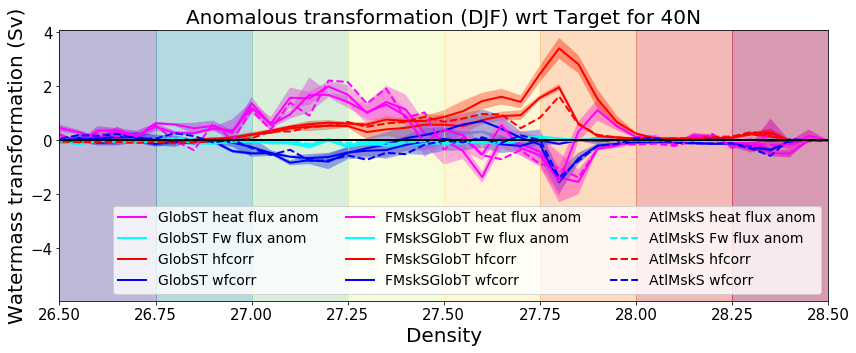

In [14]:
## Ensemble
loc="/data/vestella/Bining"
os.chdir(loc)
os.getcwd()
colors = plt.cm.Spectral(np.linspace(0, 1, 8))
plt.close()
fig, axes = plt.subplots(1,1,figsize=(12,5))

imodel = ntarget

trsftot_target_LS2= Corrs[0,imodel,:]

trsftot_target_LS2_FW= Corrs[1,imodel,:]

colors = plt.cm.Spectral_r(np.linspace(0,1,8))

for i in range(8):
    axes.axvspan(26.5+i*0.25,26.75+i*0.25, alpha=0.4, color=colors[i,:])


for iensemble in range(2):
    for ivar in range(4):
        Ennsemble = np.zeros((nmembers,trsftot_target_LS2.shape[0]))
        
    
    
        for imember in range(nmembers):
            imodel = Ensemble[iensemble]['models'][imember]
            if ivar==0:
                Ennsemble[imember,:]=ma.copy(Corrs[0,imodel,:] -trsftot_target_LS2)
                lab = Ensemble[iensemble]['label']+ ' heat flux anom'
                lss = Ensemble[iensemble]['ls']
                colors='magenta'
            elif ivar==1:
                Ennsemble[imember,:]=ma.copy(Corrs[1,imodel,:] -trsftot_target_LS2_FW)
                lab = Ensemble[iensemble]['label']+ ' Fw flux anom'
                lss = Ensemble[iensemble]['ls']
                colors='cyan'
            elif ivar==2:
                Ennsemble[imember,:]=ma.copy(Corrs[2,imodel,:] )
                lab = Ensemble[iensemble]['label']+ ' hfcorr'
                lss = Ensemble[iensemble]['ls']
                colors='red'
                
            else:
                Ennsemble[imember,:]=ma.copy(Corrs[3,imodel,:] )
                lab = Ensemble[iensemble]['label']+ ' wfcorr'
                lss = Ensemble[iensemble]['ls']
                colors='blue'

        Std, Average = Stats.ensemble_statistics(Ennsemble, nmembers, 111)
 

        axes.plot(rhon.data,Average, color=colors, label = lab,ls=lss, lw=Models[imodel]['lw']) 
        axes.fill_between(rhon.data, Average-Std,  Average+Std,
                       facecolor=colors, alpha=0.5)   

    
    
for imodel in [4]:
    
    trsftot= Corrs[0,imodel,:] -trsftot_target_LS2

    axes.plot(rhon.data,trsftot, label = Models[imodel]['label'] + ' heat flux anom',color='magenta',
                 lw=Models[imodel]['lw'],ls=Models[imodel]['ls'])

    trsftot= Corrs[1,imodel,:] -trsftot_target_LS2_FW

    axes.plot(rhon.data,trsftot, label = Models[imodel]['label'] + ' Fw flux anom',color='cyan',
                 lw=Models[imodel]['lw'],ls=Models[imodel]['ls'])


    trsftot= Corrs[2,imodel,:]

    axes.plot(rhon.data,trsftot, label = Models[imodel]['label']+ ' hfcorr',color='red',
                 lw=Models[imodel]['lw'],ls=Models[imodel]['ls'])
    
    trsftot= Corrs[3,imodel,:]

    axes.plot(rhon.data,trsftot, label = Models[imodel]['label']+ ' wfcorr',color='blue',
                 lw=Models[imodel]['lw'],ls=Models[imodel]['ls'])
    
    
for i in range(4,5):            
    axes.axhline(y=0, lw=2,color='k')
    axes.legend(loc=4, fontsize=14,ncol=3)
    axes.set_title("Anomalous transformation (DJF) wrt Target for " + Regions[i+1]['label'], fontsize=20)
    axes.set_xlabel("Density", fontsize=20)
    axes.set_ylabel("Watermass transformation (Sv)", fontsize=20)
    axes.tick_params(axis='y', labelsize=15)
    axes.tick_params(axis='x', labelsize=15)
    ylim2=np.array(axes.get_ylim())[1]-np.array(axes.get_ylim())[0]
    axes.set_ylim(bottom=np.array(axes.get_ylim())[0]-ylim2/2)
    
axes.set_xlim((26.5,28.5))

plt.tight_layout()
plt.show()


## The peaks obtained in the hfcorr around the density class 27.7-29 are investigated since we believe that the extra variability in those members might be coming from the fact that we are nudging SST only in the convective region south of Iceland. 

# Integration of the 27.7-27.9 in time

In [19]:
c = np.where((rhon.data>27.7) & (rhon.data<27.9))

In [17]:
loc="/data/vestella/Bining"
os.chdir(loc)
os.getcwd()

imodel = ntarget
ftos  = cdm.open('surf_transf_'+Models[imodel]['name']+'_New.nc')
bounds_rhon = ftos('bounds_rhon')
rhon = (bounds_rhon[:,0]+ bounds_rhon[:,1])/2.

Corrs = np.zeros((4,nmodels, 100,rhon.shape[0]))


for imodel in range(1,nmodels):
    ftos  = cdm.open('surf_transf_'+Models[imodel]['name']+'_New.nc')
    

    tab = ftos(Regions[5]['trsfhef'] , time = slice(Models[imodel]['ts0_flux'],Models[imodel]['ts1_flux']))
    valmask = tab.missing_value
    tab.data[:] = tab.filled(valmask)
    tab_reshaped=np.reshape(tab,(12,tab.shape[0]/12,tab.shape[1]),order='F')
    trsftot = ma.copy(tab_reshaped[-1,:,:])/2
    trsftot= trsftot + ma.average(tab_reshaped[:2,:,:],axis=0)/2
    
    Corrs[0,imodel,:,:] = trsftot

    tab = ftos(Regions[5]['trsfwfo'] , time = slice(Models[imodel]['ts0_flux'],Models[imodel]['ts1_flux']))
    valmask = tab.missing_value
    tab.data[:] = tab.filled(valmask)
    tab_reshaped=np.reshape(tab,(12,tab.shape[0]/12,tab.shape[1]),order='F')
    trsftot = ma.copy(tab_reshaped[-1,:,:])/2
    trsftot= trsftot + ma.average(tab_reshaped[:2,:,:],axis=0)/2

    Corrs[1,imodel,:,:] = trsftot


    ftos  = cdm.open('surf_transf_'+Models[imodel]['name']+'_New_corr.nc')
    

    tab = ftos(Regions[5]['trsfhef'] , time = slice(Models[imodel]['ts0_flux'],Models[imodel]['ts1_flux']))
    valmask = tab.missing_value
    tab.data[:] = tab.filled(valmask)
    tab_reshaped=np.reshape(tab,(12,tab.shape[0]/12,tab.shape[1]),order='F')
    trsftot = ma.copy(tab_reshaped[-1,:,:])/2
    trsftot= trsftot + ma.average(tab_reshaped[:2,:,:],axis=0)/2

    Corrs[2,imodel,:,:] =trsftot
    
    tab = ftos(Regions[5]['trsfwfo'] , time = slice(Models[imodel]['ts0_flux'],Models[imodel]['ts1_flux']))
    valmask = tab.missing_value
    tab.data[:] = tab.filled(valmask)
    tab_reshaped=np.reshape(tab,(12,tab.shape[0]/12,tab.shape[1]),order='F')
    trsftot = ma.copy(tab_reshaped[-1,:,:])/2
    trsftot= trsftot + ma.average(tab_reshaped[:2,:,:],axis=0)/2
    
    Corrs[3,imodel,:,:] = trsftot
    
    
mx = ma.masked_array(Corrs, Corrs>1.e10)
mx = ma.masked_array(mx , mx <-1.e10)

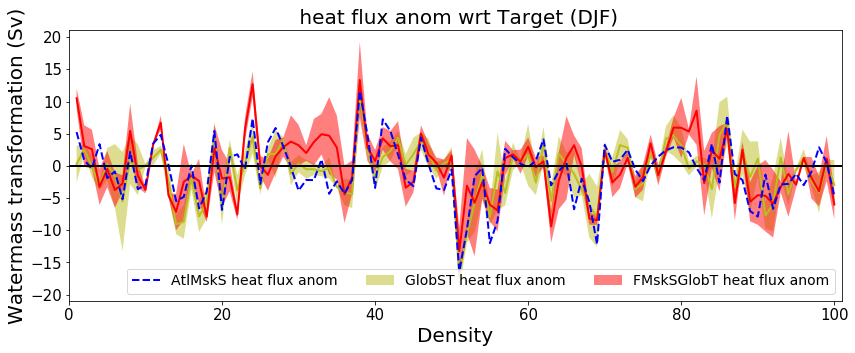

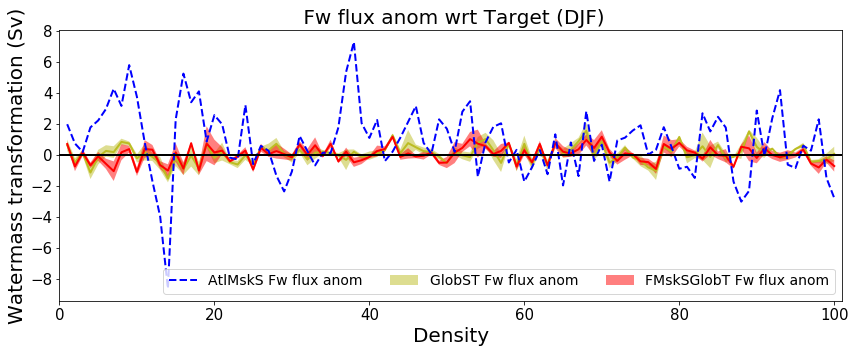

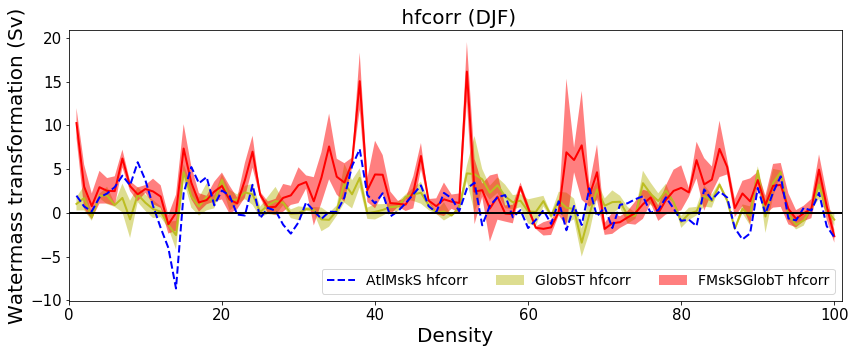

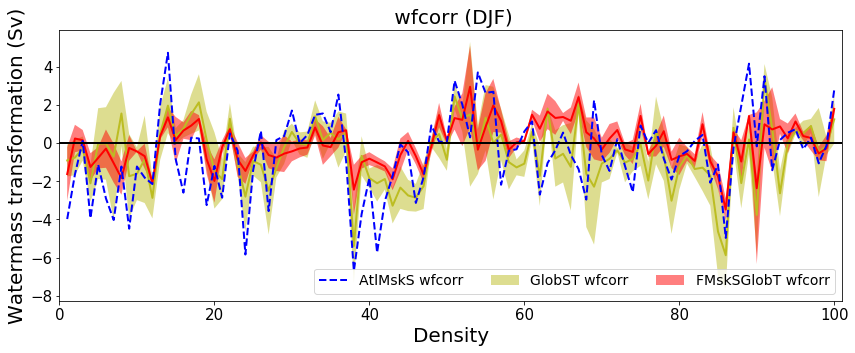

In [22]:
## Ensemble
loc="/data/vestella/Bining"
os.chdir(loc)
os.getcwd()
colors = plt.cm.Spectral(np.linspace(0, 1, 8))

imodel = ntarget

trsftot_target_LS2= mx[0,imodel,:,c]

trsftot_target_LS2_FW= mx[1,imodel,:,c]

for ivar in range(4):
    plt.close()
    fig, axes = plt.subplots(1,1,figsize=(12,5))


    for iensemble in range(3):

        if iensemble<2:


            Ennsemble = np.zeros((nmembers,100))

            for imember in range(nmembers):
                imodel = Ensemble[iensemble]['models'][imember]
                if ivar==0:
                    Ennsemble[imember,:]=ma.squeeze(ma.average(mx[0,imodel,:,c] -trsftot_target_LS2, axis=1))
                    lab = Ensemble[iensemble]['label']+ ' heat flux anom'
                    lss = Ensemble[iensemble]['ls']
                    colors='magenta'
                elif ivar==1:
                    Ennsemble[imember,:]=ma.squeeze(ma.average(mx[1,imodel,:,c] -trsftot_target_LS2_FW, axis=1))
                    lab = Ensemble[iensemble]['label']+ ' Fw flux anom'
                    lss = Ensemble[iensemble]['ls']
                    colors='cyan'
                elif ivar==2:
                    Ennsemble[imember,:]=ma.squeeze(ma.average(mx[2,imodel,:,c] , axis=1))
                    lab = Ensemble[iensemble]['label']+ ' hfcorr'
                    lss = Ensemble[iensemble]['ls']
                    colors='red'

                else:
                    Ennsemble[imember,:]=ma.squeeze(ma.average(mx[3,imodel,:,c] , axis=1))
                    lab = Ensemble[iensemble]['label']+ ' wfcorr'
                    lss = Ensemble[iensemble]['ls']
                    colors='blue'

            Std, Average = Stats.ensemble_statistics(Ennsemble, nmembers, 100)


            axes.plot(np.arange(1,101),Average, color=Ensemble[iensemble]['color'],ls=lss, lw=Models[imodel]['lw']) 
            axes.fill_between(np.arange(1,101), Average-Std,  Average+Std, label = lab,
                           facecolor=Ensemble[iensemble]['color'], alpha=0.5) 

    
    
    else:
        imodel=4
        
        if ivar==0:
            trsftot= ma.squeeze(ma.average(mx[0,imodel,:,c] -trsftot_target_LS2, axis=1))
            lab = Models[imodel]['label']+ ' heat flux anom'
            lss = Models[imodel]['ls']
            colors='magenta'
        elif ivar==1:
            trsftot= ma.squeeze(ma.average(mx[2,imodel,:,c] , axis=1))
            lab = Models[imodel]['label']+ ' Fw flux anom'
            lss = Models[imodel]['ls']
            colors='cyan'
        elif ivar==2:
            trsftot= ma.squeeze(ma.average(mx[2,imodel,:,c] , axis=1))
            lab = Models[imodel]['label']+ ' hfcorr'
            lss = Models[imodel]['ls']
            colors='red'

        else:
            trsftot= ma.squeeze(ma.average(mx[3,imodel,:,c] , axis=1))
            lab = Models[imodel]['label']+ ' wfcorr'
            lss = Models[imodel]['ls']
            colors='blue'

        

        axes.plot(np.arange(1,101),trsftot, label = lab,color='b',
                     lw=Models[imodel]['lw'],ls=lss)
    if ivar==0:
        lab = ' heat flux anom wrt Target'
    elif ivar==1:
        lab = ' Fw flux anom wrt Target'
    elif ivar==2:
        lab = ' hfcorr'
    else:
        lab = ' wfcorr'
    
          
    axes.axhline(y=0, lw=2,color='k')
    axes.legend(loc=4, fontsize=14,ncol=3)
    axes.set_title(lab+" (DJF)" , fontsize=20)
    axes.set_xlabel("Density", fontsize=20)
    axes.set_ylabel("Watermass transformation (Sv)", fontsize=20)
    axes.tick_params(axis='y', labelsize=15)
    axes.tick_params(axis='x', labelsize=15)
    ylim2=np.array(axes.get_ylim())[1]-np.array(axes.get_ylim())[0]

    axes.set_xlim(0,101)



    plt.tight_layout()
    plt.show()


## Indeed is in the hfcorr term where we observe extra variability that doesn't seem to be as strong as in the other experiments. 